序列 X1 X2 类别
1 -0.1 -0.2 -1
2 0.5 0.5 1
3 -0.5 0.2 -1
4 -0.2 0.5 -1
5 0.2 0.1 1
6 0.0 0.8 1


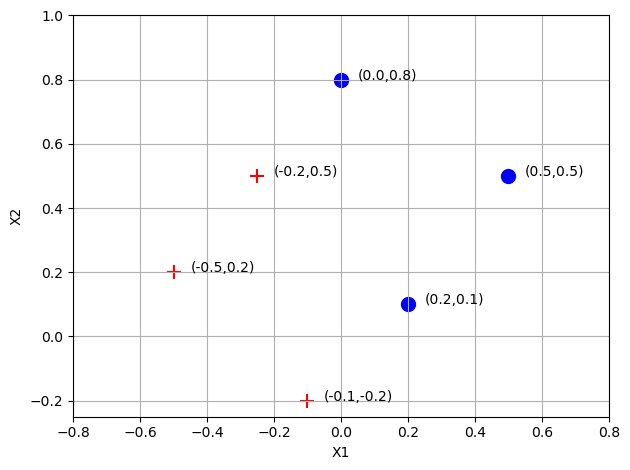

In [4]:
import sys,os,math,time
import matplotlib.pyplot as plt
from numpy import *
xdim = [(-0.1,-0.2), (0.5,0.5), (-0.5,0.2),(-0.25,0.5),(0.2,0.1),(0,0.8)]
ldim = [-1,1,-1,-1,1,1]
print("序列", "X1", "X2", "类别")
count = 0
for x,l in zip(xdim, ldim):
    count += 1
    print("%d %3.1f %3.1f %d"%(count, x[0], x[1], l))
    if l > 0:
        marker = 'o'
        color = 'blue'
    else:
        marker = '+'
        color = 'red'
    plt.scatter(x[0], x[1], marker=marker, c=color, s=100)
    plt.text(x[0]+0.05,x[1],'(%3.1f,%3.1f)'%(x[0],x[1]))
plt.axis([-0.8, 0.8,-0.25, 1])
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.tight_layout()
plt.show()

#### 实例函数实现

In [40]:
import sys,os,math,time
import matplotlib.pyplot as plt
from numpy import *

wb = [0,0,0] # wb:[b, w1, w2]
eta = 0.5    # eta: learning rate

xdim = [(-0.1,0.3), (0.5,0.7), (-0.5,0.2),(-0.7,0.3),(0.7,0.1),(0,0.5)]
ddim = [1,-1,1,1,-1,1]

def sigmoid(x):
    return 1.0/(1.0 + exp(-x))

# add learning rate compared to the example above

def hebbian(w,x,d,eta):
    x1 = [1,x[0],x[1]]
    net = eta * sum([ww*xx for ww,xx in zip(w, x1)])
    o = sigmoid(net)
    w1 = [ww+o*xx for ww,xx in zip(w,x1)]
    return w1

def perceptron(w,x,d,eta):
    x1 = [1,x[0],x[1]]
    net = eta * sum([ww*xx for ww,xx in zip(w, x1)])
    o = 1 if net >= 0 else -1
    w1 = [ww+(d-o)*xx for ww,xx in zip(w,x1)]
    return w1


def delta(w,x,d,eta):
    x1 = [1,x[0],x[1]]
    net = eta * sum([ww*xx for ww,xx in zip(w, x1)])
    o = sigmoid(net)
    o1 = o*(1-o)
    w1 = [ww+(d-o)*o1*xx for ww,xx in zip(w,x1)]
    return w1


def widrawhoff(w,x,d,eta):
    x1 = [1,x[0],x[1]]
    net = eta * sum([ww*xx for ww,xx in zip(w, x1)])
    o = sigmoid(net)
    w1 = [ww+(d-o)*xx for ww,xx in zip(w,x1)]
    return w1

def correlation(w,x,d,eta):
    x1 = [1,x[0],x[1]]
    w1 = eta * [ww+d*xx for ww,xx in zip(w,x1)]
    return w1



#### Result Encapusulation

In [47]:
def Result_Encapsulation(wb,eta, xdim,ddim,func):
    weights = [wb.copy()]
    for epoch in range(2):  # 进行两轮训练
        print(f"Epoch {epoch + 1}")
        for x, d in zip(xdim, ddim):
            wb = func(wb, x, d, eta)
            weights.append(wb.copy())
            print("hebbian", wb)
            
    weights = array(weights)

    plt.figure(figsize=(8, 6))
    # plt.plot(weights[:, 1], weights[:, 2], 'bo-', label='Weight trajectory')
    plt.scatter(weights[:, 1], weights[:, 2], c='red', label='Weight trajectory')

    plt.xlabel('w1')
    plt.ylabel('w2')
    plt.title('Weight Coefficients in Space')
    plt.legend()
    plt.grid(True)
    plt.show()

#### Hebbian Learning Algorithm

Epoch 1
hebbian [0.5, -0.05, 0.15]
hebbian [1.0719961329315186, 0.23599806646575933, 0.550397293052063]
hebbian [1.7019545155521332, -0.07898112484454795, 0.6763889695761859]
hebbian [2.4290784063253263, -0.5879678483857831, 0.8945261368081439]
hebbian [3.1705203803546333, -0.06895846656526827, 0.9686703342110745]
hebbian [4.031975396610626, -0.06895846656526827, 1.399397842339071]
Epoch 2
hebbian [4.934829347708676, -0.1592438616750732, 1.6702540276684856]
hebbian [5.887951266752649, 0.31731709784691325, 2.3374393709992667]
hebbian [6.844777564245139, -0.161096050899332, 2.5288046304977647]
hebbian [7.824105697858371, -0.8466257444285944, 2.822603070581734]
hebbian [8.801281917022978, -0.16260239101336948, 2.920320692498195]
hebbian [9.795404371416016, -0.16260239101336948, 3.417381919694714]


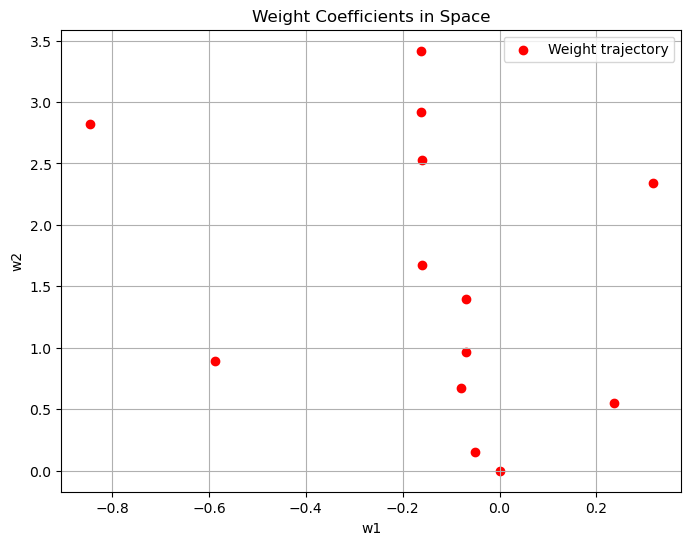

In [48]:
Result_Encapsulation(wb,eta,xdim,ddim,hebbian)

#### Perception Learning Algorithm

Epoch 1
hebbian [0, 0.0, 0.0]
hebbian [-2, -1.0, -1.4]
hebbian [0, -2.0, -0.9999999999999999]
hebbian [0, -2.0, -0.9999999999999999]
hebbian [0, -2.0, -0.9999999999999999]
hebbian [2, -2.0, 1.1102230246251565e-16]
Epoch 2
hebbian [2, -2.0, 1.1102230246251565e-16]
hebbian [0, -3.0, -1.4]
hebbian [0, -3.0, -1.4]
hebbian [0, -3.0, -1.4]
hebbian [0, -3.0, -1.4]
hebbian [2, -3.0, -0.3999999999999999]


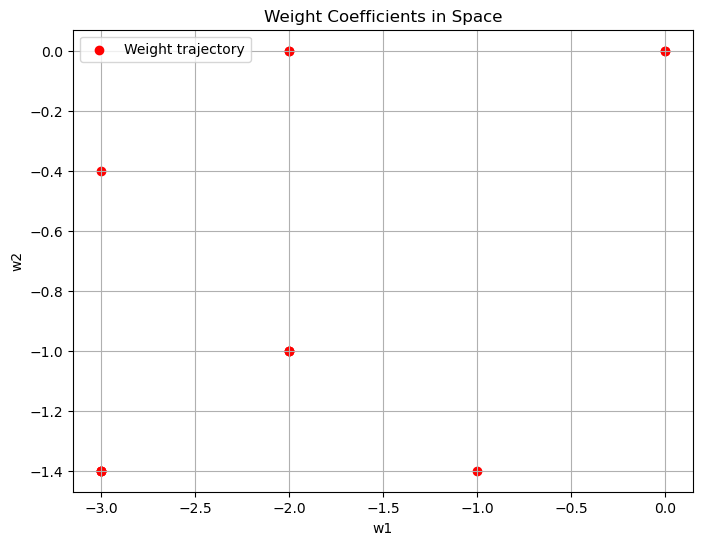

In [49]:
Result_Encapsulation(wb,eta,xdim,ddim,perceptron)

#### Delta Learning Algorithm for Regression

Epoch 1
hebbian [0.125, -0.0125, 0.0375]
hebbian [-0.2540309776632727, -0.20201548883163636, -0.22782168436429087]
hebbian [-0.12315306467213724, -0.2674544453272041, -0.2016461017660638]
hebbian [0.0017352352926508774, -0.35487625530255573, -0.16417961177662735]
hebbian [-0.3634725972380941, -0.6105217380740773, -0.20070039502970186]
hebbian [-0.22590080786611116, -0.6105217380740773, -0.13191450034371038]
Epoch 2
hebbian [-0.094860693664058, -0.6236257494942826, -0.09260246608309444]
hebbian [-0.45023377986390034, -0.8013122925942038, -0.341363626422984]
hebbian [-0.32166365824154736, -0.8655973534053802, -0.3156496020985134]
hebbian [-0.202849997337607, -0.9487669160381385, -0.2800055038273313]
hebbian [-0.5335075223335808, -1.1802271835353202, -0.31307125632692867]
hebbian [-0.3914255388151867, -1.1802271835353202, -0.24203026456773163]


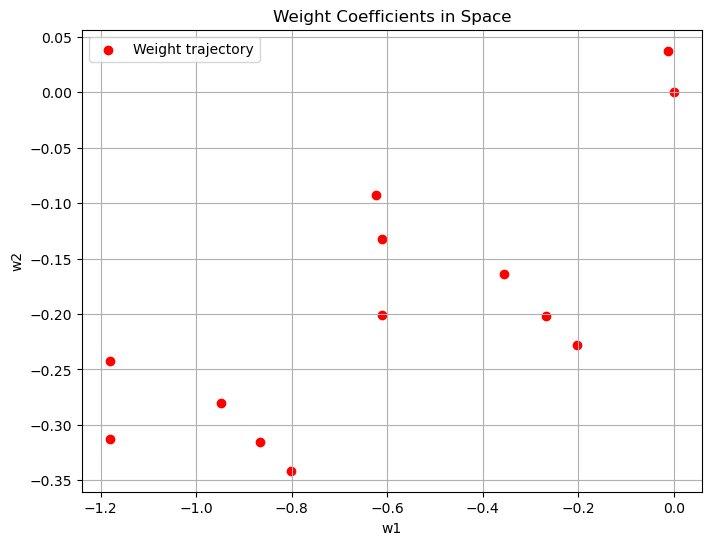

In [44]:
Result_Encapsulation(wb,eta,xdim,ddim,delta)

#### Widrow-Hoff LMS Learning Algorithm

Epoch 1
hebbian [0.5, -0.05, 0.15]
hebbian [-1.0719961329315186, -0.8359980664657594, -0.9503972930520629]
hebbian [-0.46802524379280896, -1.1379835110351142, -0.829603115224321]
hebbian [0.022015788587844254, -1.4810122337015714, -0.682590805510125]
hebbian [-1.3458285221031054, -2.438503251185236, -0.81937523657922]
hebbian [-0.6394710992699101, -2.438503251185236, -0.4661965251626223]
Epoch 2
hebbian [-0.07293313785805333, -2.4951570473264217, -0.29623513673906526]
hebbian [-1.3907250050336375, -3.154052980914214, -1.2186894437619742]
hebbian [-0.8835459480124364, -3.4076425094248144, -1.117253632357734]
hebbian [-0.5253755163694884, -3.6583618115748777, -1.0098025028648496]
hebbian [-1.6942528871487543, -4.476575971120364, -1.1266902399427763]
hebbian [-0.938635695788294, -4.476575971120364, -0.7488816442625461]


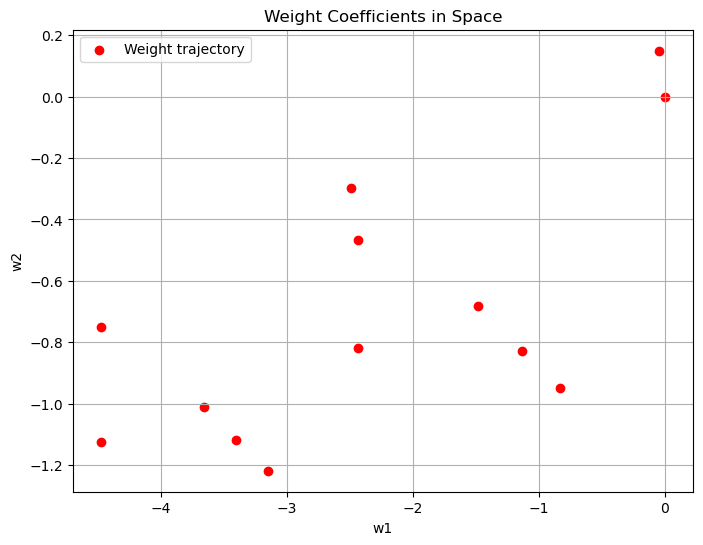

In [51]:
Result_Encapsulation(wb,eta,xdim,ddim,widrawhoff)